<a href="https://colab.research.google.com/github/Karthikrobotic/volume-estimation-by-3d-data/blob/main/yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Cell 1: install dependencies
!pip install roboflow ultralytics --quiet

# Cell 2: import libraries
from roboflow import Roboflow
from ultralytics import YOLO
from google.colab import files
import matplotlib.pyplot as plt
import cv2
import os

rf = Roboflow(api_key="6uKgxhgIrWaqlekFNM3B")
project = rf.workspace("car-xztrx").project("pot-bwaur")
version = project.version(7)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 100.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/12


Extracting Dataset Version Zip to pot-7 in yolov8:: 100%|██████████| 1688/1688 [00:00<00:00, 5051.27it/s]


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 47.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 94.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127


Extracting Dataset Version Zip to pot-7 in yolov8:: 100%|██████████| 1688/1688 [00:00<00:00, 5112.76it/s]


data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid
mv: cannot stat '/content/pot-7/pot-bwaur-5.yaml': No such file or directory
Using YAML file at: /content/pot-7/data.yaml


100%|██████████| 6.74M/6.74M [00:00<00:00, 133MB/s]


Ultralytics 8.3.141 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/pot-7/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=

100%|██████████| 755k/755k [00:00<00:00, 20.5MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

YOLOv8n-seg summary: 151 layers, 3,263,811 parameters, 3,263,795 gradients, 12.1 GFLOPs

Transferred 381/417 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 119MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1393.0±640.0 MB/s, size: 66.6 KB)


train: Scanning /content/pot-7/train/labels... 694 images, 4 backgrounds, 0 corrupt: 100%|██████████| 694/694 [00:00<00:00, 2097.69it/s]

train: New cache created: /content/pot-7/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1237.2±875.7 MB/s, size: 82.0 KB)


val: Scanning /content/pot-7/valid/labels... 95 images, 2 backgrounds, 0 corrupt: 100%|██████████| 95/95 [00:00<00:00, 1604.94it/s]

val: New cache created: /content/pot-7/valid/labels.cache


Plotting labels to runs/segment/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100      1.38G      1.462      2.951      2.496      1.501         14        640: 100%|██████████| 87/87 [00:21<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.80it/s]

                   all         95        124      0.763       0.29      0.436      0.181      0.513      0.331       0.42      0.162



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100      1.71G        1.5      2.551      2.138       1.52         13        640: 100%|██████████| 87/87 [00:17<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.80it/s]


                   all         95        124      0.288      0.194      0.165     0.0654      0.282      0.282      0.175     0.0711

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100      1.72G      1.531      2.502      1.923      1.541         11        640: 100%|██████████| 87/87 [00:16<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.26it/s]

                   all         95        124      0.573      0.411      0.493      0.199      0.582      0.419      0.505      0.212



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100      1.74G      1.539      2.505      1.839      1.547         12        640: 100%|██████████| 87/87 [00:16<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.04it/s]


                   all         95        124      0.511      0.508      0.495       0.23      0.536      0.532      0.506      0.232

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100      1.76G      1.518      2.457      1.728      1.548         15        640: 100%|██████████| 87/87 [00:16<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.20it/s]

                   all         95        124      0.601      0.558      0.552      0.262      0.636      0.605      0.603      0.302



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100      1.78G      1.465      2.429      1.606      1.507         14        640: 100%|██████████| 87/87 [00:17<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.18it/s]

                   all         95        124      0.716      0.661      0.714      0.378      0.734      0.669      0.702      0.408



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100      1.79G      1.425      2.353      1.501      1.476         24        640: 100%|██████████| 87/87 [00:16<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.09it/s]

                   all         95        124      0.585      0.749      0.697      0.364      0.603      0.766      0.708      0.401



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100      1.82G      1.458      2.412      1.487      1.489         11        640: 100%|██████████| 87/87 [00:18<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.15it/s]


                   all         95        124      0.539      0.532      0.567      0.292      0.543      0.517      0.566      0.309

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100      1.83G      1.409      2.346      1.463      1.463         14        640: 100%|██████████| 87/87 [00:16<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.32it/s]

                   all         95        124      0.494      0.532      0.511      0.261      0.485      0.516      0.492      0.248



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100      1.85G      1.415      2.411      1.468      1.443         15        640: 100%|██████████| 87/87 [00:18<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.26it/s]


                   all         95        124      0.642      0.629      0.675      0.335      0.728      0.647      0.715      0.379

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100      1.87G      1.369      2.212      1.368      1.444         14        640: 100%|██████████| 87/87 [00:16<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.23it/s]


                   all         95        124      0.731      0.613      0.718      0.396      0.761      0.637      0.732      0.396

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100      1.89G      1.361      2.218      1.296      1.396         16        640: 100%|██████████| 87/87 [00:17<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.30it/s]

                   all         95        124      0.722      0.702      0.764      0.421      0.764      0.733      0.781      0.443



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100      1.91G      1.322      2.123      1.293      1.377         15        640: 100%|██████████| 87/87 [00:16<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.34it/s]

                   all         95        124      0.719      0.694      0.716      0.405      0.772      0.726      0.766      0.407



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100      1.92G      1.346      2.261      1.335       1.43         14        640: 100%|██████████| 87/87 [00:16<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.43it/s]

                   all         95        124      0.626      0.771      0.747      0.406      0.641      0.792      0.758      0.414



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100      1.94G      1.303      2.188      1.201      1.369          8        640: 100%|██████████| 87/87 [00:16<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.30it/s]

                   all         95        124      0.765      0.653      0.747      0.417      0.783      0.668      0.749      0.416



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100      1.96G        1.3      2.123      1.221      1.363         15        640: 100%|██████████| 87/87 [00:16<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.95it/s]

                   all         95        124      0.781      0.685      0.772      0.434      0.781      0.685      0.764      0.441



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100      1.98G      1.275      2.109      1.211      1.348         11        640: 100%|██████████| 87/87 [00:17<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.34it/s]

                   all         95        124      0.807       0.71      0.796      0.469      0.832      0.726      0.821      0.484



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100         2G      1.258      2.097      1.185      1.352         14        640: 100%|██████████| 87/87 [00:16<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.25it/s]

                   all         95        124      0.755      0.645      0.747      0.418      0.755      0.645      0.747      0.429



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.02G      1.301      2.139      1.219      1.366         25        640: 100%|██████████| 87/87 [00:17<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.36it/s]

                   all         95        124      0.784      0.669      0.767      0.411      0.823      0.694      0.783      0.425



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.04G      1.248      2.068      1.168      1.337         19        640: 100%|██████████| 87/87 [00:16<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.34it/s]

                   all         95        124      0.651      0.781      0.753      0.419      0.635       0.79      0.742      0.407



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.05G      1.258      2.095      1.125      1.354         18        640: 100%|██████████| 87/87 [00:18<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.38it/s]

                   all         95        124       0.82      0.726      0.842      0.526      0.839      0.717      0.849      0.512



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.07G      1.222      1.996      1.108      1.334          6        640: 100%|██████████| 87/87 [00:16<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.27it/s]

                   all         95        124      0.789      0.814      0.833      0.478      0.817      0.847      0.861      0.495



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.09G      1.217      2.075      1.113      1.325         22        640: 100%|██████████| 87/87 [00:17<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.20it/s]

                   all         95        124      0.808      0.702      0.825      0.488      0.813      0.726      0.826      0.485



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.11G      1.206      2.096      1.087      1.333         13        640: 100%|██████████| 87/87 [00:16<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.29it/s]

                   all         95        124      0.749      0.718      0.814      0.484      0.784      0.732       0.83      0.492



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.13G      1.238      2.007      1.109       1.35         22        640: 100%|██████████| 87/87 [00:17<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.00it/s]

                   all         95        124      0.847      0.801      0.853      0.524       0.85      0.775      0.852      0.503



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.15G      1.229      2.082      1.099      1.329         10        640: 100%|██████████| 87/87 [00:16<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.36it/s]

                   all         95        124      0.824      0.718      0.841      0.498      0.763      0.806      0.843      0.507



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.17G       1.18      1.946       1.05      1.309         17        640: 100%|██████████| 87/87 [00:17<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.33it/s]

                   all         95        124      0.809      0.798      0.851      0.537      0.801       0.79      0.837      0.535



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.18G      1.215      2.025      1.074      1.334         13        640: 100%|██████████| 87/87 [00:17<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.27it/s]


                   all         95        124      0.861      0.746      0.814      0.502       0.88      0.758      0.824      0.502

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100       2.2G       1.21       1.97      1.063      1.313         10        640: 100%|██████████| 87/87 [00:16<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.35it/s]

                   all         95        124      0.821       0.74      0.811      0.481      0.811      0.728      0.806      0.483



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.22G       1.18      1.985      1.038       1.29         15        640: 100%|██████████| 87/87 [00:17<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.28it/s]

                   all         95        124      0.747      0.774      0.814       0.47      0.795      0.758      0.838      0.491



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.24G      1.172       1.95      1.048       1.29         11        640: 100%|██████████| 87/87 [00:16<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.97it/s]

                   all         95        124      0.784      0.732      0.824      0.475      0.801      0.748      0.835      0.493



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.26G      1.162      1.964      1.021      1.281         16        640: 100%|██████████| 87/87 [00:17<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.37it/s]

                   all         95        124      0.865      0.726      0.831      0.503      0.875      0.734      0.839      0.491



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.28G       1.14      1.897     0.9706      1.266         12        640: 100%|██████████| 87/87 [00:16<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.46it/s]

                   all         95        124      0.804      0.806      0.853      0.527      0.804      0.806      0.846      0.525



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.29G      1.142      1.898       0.98      1.275         16        640: 100%|██████████| 87/87 [00:18<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.35it/s]

                   all         95        124      0.803      0.815       0.86      0.518      0.803      0.815      0.852      0.527



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.31G      1.139      1.931      1.016      1.274         17        640: 100%|██████████| 87/87 [00:16<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.27it/s]


                   all         95        124      0.852       0.79      0.845      0.547      0.852       0.79       0.85      0.545

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.33G      1.134      1.927     0.9683      1.277          7        640: 100%|██████████| 87/87 [00:17<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.38it/s]

                   all         95        124      0.831       0.71      0.803      0.499      0.841      0.723      0.807      0.495



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.35G      1.137      1.847     0.9504      1.281         23        640: 100%|██████████| 87/87 [00:16<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.45it/s]

                   all         95        124      0.783      0.813       0.85      0.524       0.79       0.82      0.859      0.526



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.37G      1.135      1.888      0.951      1.285         21        640: 100%|██████████| 87/87 [00:17<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.34it/s]

                   all         95        124      0.805       0.75      0.847      0.548      0.816      0.766      0.851      0.533



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.39G       1.13      1.883     0.9464      1.258         11        640: 100%|██████████| 87/87 [00:16<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.33it/s]

                   all         95        124      0.862      0.758      0.866      0.571      0.874      0.758      0.876       0.55



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100       2.4G      1.125      1.871     0.9233      1.261         13        640: 100%|██████████| 87/87 [00:16<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.31it/s]

                   all         95        124      0.838      0.815      0.874       0.56      0.838      0.815      0.866      0.541



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.42G      1.096      1.815      0.922      1.258         17        640: 100%|██████████| 87/87 [00:16<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.44it/s]

                   all         95        124      0.782      0.781      0.848      0.539      0.812       0.75       0.83      0.523



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.44G       1.13      1.859      0.924      1.252          9        640: 100%|██████████| 87/87 [00:16<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.47it/s]

                   all         95        124      0.779      0.766      0.831      0.511      0.771      0.758      0.811      0.512



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.46G      1.092      1.813     0.9158      1.253         15        640: 100%|██████████| 87/87 [00:17<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.38it/s]

                   all         95        124      0.839      0.742      0.854      0.525      0.837      0.742      0.841      0.507



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.48G      1.114      1.813     0.9049      1.264         15        640: 100%|██████████| 87/87 [00:17<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.27it/s]

                   all         95        124      0.819      0.774      0.856      0.532      0.891      0.723      0.857      0.517



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/100       2.5G      1.119      1.813     0.9176      1.258         11        640: 100%|██████████| 87/87 [00:17<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.46it/s]

                   all         95        124      0.835       0.79      0.873      0.578      0.774      0.839      0.864      0.554



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.52G      1.099      1.826     0.9019      1.252         10        640: 100%|██████████| 87/87 [00:16<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.45it/s]

                   all         95        124      0.869      0.782      0.875      0.565      0.878       0.79      0.871      0.546



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.54G      1.081      1.849     0.9079      1.239         13        640: 100%|██████████| 87/87 [00:17<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.24it/s]

                   all         95        124      0.891      0.722      0.867      0.572      0.888      0.726       0.86      0.552



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.55G       1.05      1.755     0.8734      1.224         17        640: 100%|██████████| 87/87 [00:16<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.36it/s]

                   all         95        124      0.865       0.79      0.881      0.576      0.865       0.79      0.875      0.569



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.57G      1.058      1.768     0.8657      1.225         20        640: 100%|██████████| 87/87 [00:17<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.55it/s]

                   all         95        124      0.794      0.775      0.847      0.528      0.818      0.766      0.837      0.522



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.59G      1.078      1.819     0.8717      1.235         18        640: 100%|██████████| 87/87 [00:16<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.34it/s]

                   all         95        124      0.881      0.773      0.876       0.57      0.944      0.766      0.883      0.565



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.61G       1.06      1.811     0.8615      1.232         20        640: 100%|██████████| 87/87 [00:17<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.39it/s]

                   all         95        124      0.859      0.798      0.882      0.557      0.848      0.831       0.88      0.557



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.63G      1.062      1.724     0.8387      1.226         11        640: 100%|██████████| 87/87 [00:16<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.35it/s]

                   all         95        124      0.854        0.8      0.859      0.551      0.862      0.808      0.863      0.517



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.64G      1.063      1.779     0.8571      1.219         15        640: 100%|██████████| 87/87 [00:16<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.29it/s]

                   all         95        124      0.869      0.805      0.842      0.527      0.877      0.806      0.839      0.508



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.67G      1.008      1.692     0.8398      1.203         12        640: 100%|██████████| 87/87 [00:17<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.42it/s]

                   all         95        124      0.863      0.761      0.854      0.562      0.872      0.769      0.856      0.537



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.69G      1.035       1.75     0.8114      1.201         19        640: 100%|██████████| 87/87 [00:16<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.35it/s]

                   all         95        124      0.857       0.79      0.866      0.566      0.839      0.774      0.846      0.534



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/100       2.7G       1.01      1.718     0.8077      1.197         17        640: 100%|██████████| 87/87 [00:17<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.43it/s]

                   all         95        124      0.841      0.798       0.86       0.58      0.841      0.798      0.858      0.552



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.72G      1.041      1.795     0.8196      1.213         17        640: 100%|██████████| 87/87 [00:16<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.48it/s]

                   all         95        124      0.818      0.774      0.852      0.555      0.835       0.79       0.85       0.53



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.74G      1.047      1.793     0.8145        1.2         14        640: 100%|██████████| 87/87 [00:17<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.49it/s]

                   all         95        124      0.833      0.805      0.845      0.558      0.833      0.805      0.838      0.544



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.76G      1.065      1.777     0.8475       1.23         16        640: 100%|██████████| 87/87 [00:16<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.29it/s]

                   all         95        124      0.828      0.831      0.869      0.559      0.836      0.822      0.855      0.551



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.77G      1.048      1.776     0.8096      1.214         19        640: 100%|██████████| 87/87 [00:17<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.47it/s]


                   all         95        124       0.78      0.888      0.874      0.576      0.806      0.831       0.86      0.555

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/100       2.8G      1.004       1.69      0.828      1.199         20        640: 100%|██████████| 87/87 [00:16<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.35it/s]

                   all         95        124      0.767      0.839      0.844       0.56      0.783      0.855       0.85      0.544



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.81G      1.039      1.717      0.808      1.226         22        640: 100%|██████████| 87/87 [00:16<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.41it/s]

                   all         95        124      0.879      0.759      0.869       0.56      0.879      0.759      0.858      0.546



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.84G     0.9664      1.696     0.7793      1.175          7        640: 100%|██████████| 87/87 [00:16<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.41it/s]

                   all         95        124      0.855      0.806      0.871       0.58      0.866      0.798       0.87      0.568



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.85G      0.984       1.69     0.7767      1.191         15        640: 100%|██████████| 87/87 [00:16<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.34it/s]

                   all         95        124      0.837      0.784      0.867       0.55      0.863      0.763       0.85      0.532



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.87G      1.007      1.703     0.7939      1.197         13        640: 100%|██████████| 87/87 [00:17<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.45it/s]

                   all         95        124      0.872       0.79      0.879      0.581      0.889      0.774      0.875      0.569



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.89G     0.9815      1.692     0.7515      1.179         14        640: 100%|██████████| 87/87 [00:16<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.37it/s]

                   all         95        124      0.836      0.815      0.891      0.584      0.827      0.806      0.876       0.57



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.91G      0.997      1.668     0.7829      1.177         19        640: 100%|██████████| 87/87 [00:17<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.28it/s]

                   all         95        124      0.857      0.774      0.861      0.569      0.877       0.79      0.874      0.556



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.93G      1.003      1.708     0.7514      1.188         16        640: 100%|██████████| 87/87 [00:17<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.33it/s]

                   all         95        124      0.888      0.782      0.865      0.559      0.896      0.782      0.864      0.539



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.95G     0.9905      1.679     0.7379      1.182         15        640: 100%|██████████| 87/87 [00:18<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.46it/s]

                   all         95        124      0.893       0.75      0.859      0.545      0.834      0.812      0.862       0.55



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.96G     0.9719      1.633     0.7525      1.166         11        640: 100%|██████████| 87/87 [00:16<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.37it/s]

                   all         95        124      0.927      0.712      0.865      0.574      0.795      0.806      0.856      0.563



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.98G     0.9746      1.651     0.7522      1.163         18        640: 100%|██████████| 87/87 [00:18<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.20it/s]

                   all         95        124      0.826       0.79      0.864      0.566      0.836      0.783      0.855      0.551



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/100         3G      0.954      1.639     0.7553      1.167         16        640: 100%|██████████| 87/87 [00:16<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.39it/s]

                   all         95        124       0.87      0.823      0.888      0.595      0.861      0.815      0.871      0.574



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/100      3.02G      0.964      1.689     0.7337      1.158         10        640: 100%|██████████| 87/87 [00:17<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.95it/s]

                   all         95        124      0.814       0.81      0.867      0.561      0.806      0.803      0.853      0.547



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/100      3.04G     0.9316      1.601     0.7186      1.151         18        640: 100%|██████████| 87/87 [00:16<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.34it/s]

                   all         95        124      0.846      0.823      0.877      0.579      0.838      0.815      0.867      0.565



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/100      3.05G     0.9525      1.634     0.7323      1.178         11        640: 100%|██████████| 87/87 [00:16<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.51it/s]

                   all         95        124      0.774      0.828      0.843      0.561      0.859      0.739      0.837      0.545



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/100      3.07G     0.9402      1.611      0.742       1.16         12        640: 100%|██████████| 87/87 [00:17<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.43it/s]

                   all         95        124      0.824      0.791      0.846      0.573      0.815      0.783      0.838      0.544



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/100      3.09G     0.9624      1.621      0.713       1.16         22        640: 100%|██████████| 87/87 [00:16<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.50it/s]

                   all         95        124      0.793      0.834      0.867      0.565      0.798      0.827      0.859      0.544



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/100      3.11G     0.9232      1.585     0.7014      1.144         13        640: 100%|██████████| 87/87 [00:17<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.36it/s]

                   all         95        124      0.857      0.775       0.85      0.563      0.866      0.783      0.851      0.546



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/100      3.13G     0.9054       1.53     0.6822      1.125         12        640: 100%|██████████| 87/87 [00:17<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.39it/s]

                   all         95        124      0.885      0.745       0.85      0.567      0.895      0.753      0.852      0.547



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/100      3.15G     0.9171      1.581     0.6859      1.145         16        640: 100%|██████████| 87/87 [00:18<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.44it/s]

                   all         95        124      0.813      0.804      0.857      0.562      0.823      0.823      0.859      0.545



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/100      3.16G     0.9128      1.612     0.6762      1.119         14        640: 100%|██████████| 87/87 [00:17<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.30it/s]

                   all         95        124       0.79      0.798      0.853      0.567      0.822      0.831      0.858      0.547



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/100      3.19G     0.8975      1.568     0.6813       1.12          9        640: 100%|██████████| 87/87 [00:18<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.25it/s]

                   all         95        124      0.865       0.79      0.862      0.587      0.874      0.798      0.861       0.56



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/100       3.2G     0.9275      1.644     0.6779      1.141         16        640: 100%|██████████| 87/87 [00:16<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.20it/s]

                   all         95        124       0.79      0.815      0.849      0.582       0.82       0.79      0.851      0.558



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/100      3.22G     0.8972      1.537     0.6708      1.118         13        640: 100%|██████████| 87/87 [00:17<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.12it/s]

                   all         95        124      0.833       0.79      0.849      0.568      0.785      0.826      0.841      0.544



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/100      3.24G       0.89      1.556     0.6573      1.125         10        640: 100%|██████████| 87/87 [00:16<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.31it/s]

                   all         95        124      0.782      0.815      0.847      0.566      0.801      0.831      0.848      0.543



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/100      3.26G     0.8807      1.569     0.6591      1.125          6        640: 100%|██████████| 87/87 [00:16<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.43it/s]

                   all         95        124      0.846      0.815      0.867      0.578      0.846      0.815      0.865      0.566



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/100      3.28G     0.9187      1.563     0.6733      1.127         13        640: 100%|██████████| 87/87 [00:16<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.32it/s]

                   all         95        124      0.801      0.839      0.858      0.581      0.824      0.831      0.861      0.562



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/100      3.29G     0.8838      1.553     0.6654      1.111         20        640: 100%|██████████| 87/87 [00:16<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.42it/s]

                   all         95        124      0.834      0.774      0.849       0.57      0.855      0.774      0.848      0.551



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/100      3.31G     0.9069      1.568     0.6635      1.139         15        640: 100%|██████████| 87/87 [00:17<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.41it/s]

                   all         95        124      0.811      0.839      0.865      0.564      0.803      0.831      0.853       0.55



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/100      3.33G     0.8957      1.555     0.6637      1.117         12        640: 100%|██████████| 87/87 [00:16<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.30it/s]

                   all         95        124      0.838      0.834      0.864      0.572      0.838      0.834       0.86      0.557


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/100      3.35G     0.8183      1.435     0.5856      1.106          8        640: 100%|██████████| 87/87 [00:18<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.34it/s]

                   all         95        124       0.86      0.744      0.841      0.564      0.869      0.752      0.848      0.554



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/100      3.37G      0.773       1.38     0.5388      1.073          8        640: 100%|██████████| 87/87 [00:15<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.30it/s]

                   all         95        124      0.895      0.756      0.854      0.572      0.905      0.765      0.861      0.557



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/100      3.39G     0.7696      1.355     0.5173      1.082         10        640: 100%|██████████| 87/87 [00:16<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.60it/s]

                   all         95        124      0.789      0.844      0.859       0.57      0.789      0.844      0.856      0.553



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/100      3.41G     0.7682      1.336     0.5224      1.069          9        640: 100%|██████████| 87/87 [00:15<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.33it/s]

                   all         95        124      0.794      0.798      0.855      0.568       0.81      0.806      0.857      0.552



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/100      3.43G     0.7571      1.338     0.5061      1.075         10        640: 100%|██████████| 87/87 [00:15<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.42it/s]

                   all         95        124      0.781      0.834      0.859       0.57      0.771      0.855       0.86      0.554



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/100      3.45G     0.7578      1.332     0.5041      1.059          6        640: 100%|██████████| 87/87 [00:17<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.30it/s]

                   all         95        124      0.791      0.825      0.867       0.58      0.799      0.833      0.866      0.566



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/100      3.46G     0.7417       1.33     0.4971      1.056          6        640: 100%|██████████| 87/87 [00:15<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.37it/s]

                   all         95        124      0.816      0.815      0.863      0.582      0.816      0.822      0.866      0.564



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/100      3.48G     0.7532       1.32      0.493      1.065          6        640: 100%|██████████| 87/87 [00:15<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.61it/s]

                   all         95        124      0.857      0.774      0.862      0.576      0.857      0.774      0.862      0.557



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/100       3.5G     0.7366      1.329     0.4798      1.062          9        640: 100%|██████████| 87/87 [00:16<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.40it/s]

                   all         95        124      0.839      0.806      0.864      0.577      0.839      0.806       0.86      0.555



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/100      3.52G      0.746      1.316     0.4953      1.077          6        640: 100%|██████████| 87/87 [00:15<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.48it/s]

                   all         95        124      0.838       0.79      0.865      0.578      0.838       0.79      0.865      0.556



100 epochs completed in 0.519 hours.
Optimizer stripped from runs/segment/train/weights/last.pt, 6.8MB
Optimizer stripped from runs/segment/train/weights/best.pt, 6.8MB

Validating runs/segment/train/weights/best.pt...
Ultralytics 8.3.141 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-seg summary (fused): 85 layers, 3,258,259 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/6 [00:00<?, ?it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  17%|█▋        | 1/6 [00:00<00:00,  5.31it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  33%|███▎      | 2/6 [00:00<00:01,  2.88it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  50%|█████     | 3/6 [00:01<00:01,  1.56it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  67%|██████▋   | 4/6 [00:03<00:02,  1.01s/it]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  83%|████████▎ | 5/6 [00:04<00:01,  1.16s/it]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.11it/s]


                   all         95        124      0.868      0.823      0.888      0.594       0.86      0.815      0.871      0.574
Speed: 1.2ms preprocess, 8.0ms inference, 0.0ms loss, 6.6ms postprocess per image
Results saved to runs/segment/train


Saving IMG11.png to IMG11.png
WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()


WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.
image 1/1 /content/IMG11.png: 384x640 1 pothole, 51.6ms
Speed: 2.4ms preprocess, 51.6ms inference, 30.4ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/train2


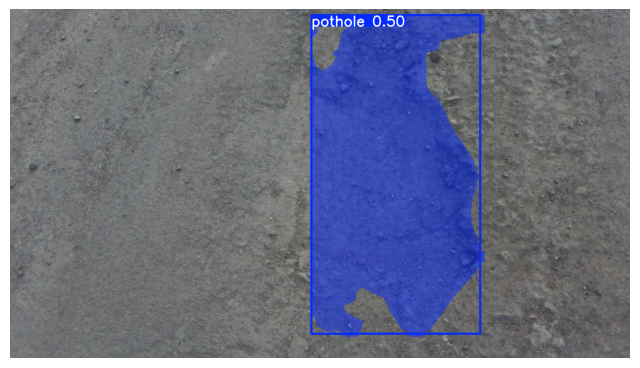

In [ ]:
# Cell 1: install dependencies
!pip install roboflow ultralytics --quiet

# Cell 2: import libraries
from roboflow import Roboflow
from ultralytics import YOLO
from google.colab import files
import matplotlib.pyplot as plt
import cv2
import os

rf = Roboflow(api_key="6uKgxhgIrWaqlekFNM3B")
project = rf.workspace("car-xztrx").project("pot-bwaur")
version = project.version(7)
dataset = version.download("yolov8")


# Cell 3: download your RoboFlow dataset
# — replace YOUR_API_KEY, WORKSPACE, PROJECT_NAME, VERSION_NUMBER
# this creates a folder 'PROJECT_NAME-VERSION' with train/valid/labels and a data.yaml

# Cell 4: train (fixed)
# First, inspect what's in the folder
!ls {dataset.location}

# If the YAML is named something other than data.yaml, either rename it:
!mv {dataset.location}/pot-bwaur-5.yaml {dataset.location}/data.yaml

# —or— just read the real path from the dataset object:
yaml_path = getattr(dataset, "data_yaml", f"{dataset.location}/data.yaml")
print("Using YAML file at:", yaml_path)

model = YOLO("yolov8n-seg.pt")
model.train(
    data=yaml_path,
    epochs=100,
    imgsz=640,
    batch=8,
    augment=True,
)

# Cell 5: upload and segment a new image
uploaded = files.upload()  # click “Choose Files” in Colab UI
for fn in uploaded.keys():
    # run segmentation
    results = model.predict(
        source=fn,
        save=True,    # save an output in runs/segment/predict/
        show=True     # display inline in Colab
    )
    # you can also load and display the saved image manually:
    out_path = results[0].plot()  # returns OpenCV image with masks overlaid
    out_bgr = out_path[:, :, ::-1]  # convert RGB to BGR for OpenCV
    plt.figure(figsize=(8,8))
    plt.axis("off")
    plt.imshow(out_bgr)
    plt.show()


In [ ]:
# In your _original_ Colab notebook, after training finishes:

from google.colab import files

# Path to your best checkpoint
checkpoint_path = "/content/runs/segment/train/weights/best.pt"

# Download to your local machine
files.download(checkpoint_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
uploaded = files.upload()   # click “Choose Files” and pick best.pt


In [ ]:
import cv2
import numpy as np
import open3d as o3d
import matplotlib.pyplot as plt
from ultralytics import YOLO

# ---- CONFIG ----
IMG_PATH = "/Users/nkarthik/Downloads/poth/IMG12.png"
DEPTH_PATH = "/Users/nkarthik/Downloads/poth/D12.png"  # depth in mm as PNG
MODEL_WEIGHTS = "/Users/nkarthik/Downloads/best.pt"

# Camera intrinsics (modify to your own)
fx, fy = 944.8592529296875, 944.8592529296875
cx, cy = 629.7156372070312, 359.9354248046875

# ---- 1) Load images ----
# Color
color_bgr = cv2.imread(IMG_PATH)
color_rgb = cv2.cvtColor(color_bgr, cv2.COLOR_BGR2RGB)
H, W = color_rgb.shape[:2]
# Depth (mm -> meters)
depth_raw = cv2.imread(DEPTH_PATH, cv2.IMREAD_UNCHANGED).astype(np.float32)
depth = depth_raw / 1000.0

# Precompute backprojection grids
u = np.tile(np.arange(W), (H, 1))
v = np.tile(np.arange(H)[:, None], (1, W))
Z = depth
X = (u - cx) * Z / fx
Y = (v - cy) * Z / fy

# Prepare flattened arrays once
dxyz_all = np.stack((X, Y, Z), axis=-1).reshape(-1, 3)
rgb_all = (color_rgb.reshape(-1, 3) / 255.0)

# ---- 2) Run YOLO segmentation/detection ----
model = YOLO(MODEL_WEIGHTS)
results = model.predict(source=IMG_PATH, save=False, augment=False)
res = results[0]

# Segmentation masks from YOLO (may be at model resolution)
masks = res.masks.data.cpu().numpy()  # shape: (N, h_model, w_model)

# ---- 3) For each instance, extract 3D points ----
all_pointclouds = []
for idx, mask in enumerate(masks):
    # Resize mask to original image size
    mask_resized = cv2.resize(mask.astype(np.uint8), (W, H), interpolation=cv2.INTER_NEAREST).astype(bool)
    mask_flat = mask_resized.ravel()

    # Filter points where mask is True and depth valid
    valid = mask_flat & (dxyz_all[:, 2] > 0) & (~np.isnan(dxyz_all[:, 2]))
    pts3d = dxyz_all[valid]
    cols3d = rgb_all[valid]

    # Create Open3D point cloud
    pcd = o3d.geometry.PointCloud()
    pcd.points = o3d.utility.Vector3dVector(pts3d)
    pcd.colors = o3d.utility.Vector3dVector(cols3d)
    all_pointclouds.append(pcd)
    print(f"Instance {idx}: {len(pts3d)} points extracted.")

# ---- 4) Visualize all segments ----
o3d.visualization.draw_geometries(all_pointclouds, window_name="YOLO-segmented 3D Point Clouds")

# ---- Optional: display 2D overlay ----
fig, ax = plt.subplots(1, figsize=(8,6))
ax.imshow(color_rgb)
for idx, mask in enumerate(masks):
    # Resize for contour extraction
    m = cv2.resize(mask.astype(np.uint8), (W, H), interpolation=cv2.INTER_NEAREST)
    contours, _ = cv2.findContours(m*255, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(color_rgb, contours, -1, (255,0,0), 2)
ax.axis('off')
plt.title('2D Predictions Overlay')
plt.show()
